In [1]:
# Make sure that the necessary packages are installed
import sys
# !{sys.executable} -m pip -q install --upgrade pip
# !{sys.executable} -m pip -q install numpy matplotlib

In [2]:
# Plotting libraries
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm, colors

from scipy.ndimage.filters import uniform_filter1d

# Numerical and array operations
import numpy as np

# Format the output
from IPython.display import display, Markdown, Latex

In [131]:
# Read the polarization data
horizontal_polarization = np.loadtxt('Raw Data/Phase Measurement/Phase_Patch_RIGHT_FrequencySweep.txt')
vertical_polarization = np.loadtxt('Raw Data/Phase Measurement/Phase_Patch_UP_FrequencySweep.txt')

# Read the S21 data
horizontal_slice = np.loadtxt('Raw Data/Gain Measurement/S21_horn-patch_RIGHT.txt')
vertical_slice = np.loadtxt('Raw Data/Gain Measurement/S21_horn-patch_UP.txt')

# Save to variables
v_phase = np.asarray([phase[1] for phase in vertical_polarization])
h_phase = np.asarray([phase[1] for phase in horizontal_polarization])
frequency = np.asarray([f[0] for f in vertical_polarization]) # Frequenct range is the same in both files

v_slice_dB = np.asarray([s21[1] for s21 in vertical_slice])
h_slice_dB = np.asarray([s21[1] for s21 in horizontal_slice])
frequency_gn = np.asarray([f[0] for f in vertical_slice])

## Phase difference calculation and plotting

In [134]:
# Calculate the phase difference and compensate for the negative values
phase_dif = np.subtract(h_phase, v_phase)
phase_dif = np.where(phase_dif < 0, 360 + phase_dif, phase_dif)

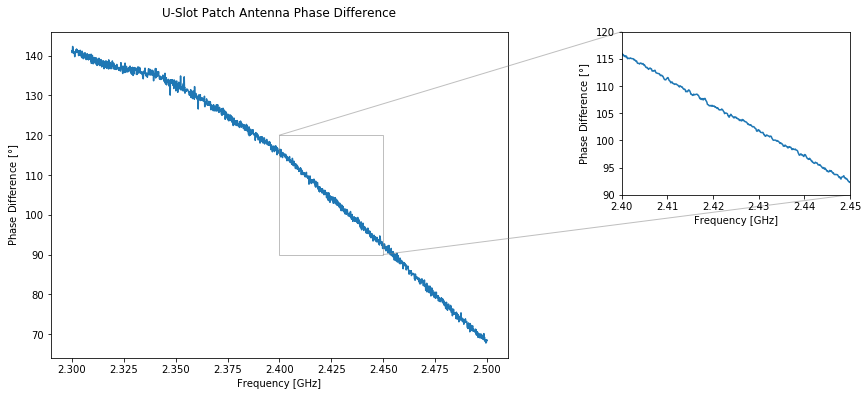

In [162]:
# Create the figure and the space
fig = plt.figure(figsize=(18, 6))
#fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
#ax_2 = fig.add_subplot(1, 2, 2)

# Plot the pattern
plot = ax.plot(frequency, phase_dif)

# In-set axis
zoom = ax.inset_axes([1.25, 0.5, 0.5, 0.5])
#smth = uniform_filter1d(np.subtract(v_phase, h_phase), size=5)
smth = uniform_filter1d(phase_dif, size=5)
zoom.plot(frequency, smth)

zoom.set_xlim(2.40, 2.45)
zoom.set_ylim(90, 120)
zoom.set_xlabel('Frequency [GHz]')
zoom.set_ylabel('Phase Difference [$\degree$]')

ax.indicate_inset_zoom(zoom)

# Change the axis lebels and the title
ax.set_title('U-Slot Patch Antenna Phase Difference', pad=15)
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Phase Difference [$\degree$]')

# Draw the surface
plt.show()

## Axial Ratio calculation _(Frequency)_

Source used for the following calculations can be found [here](https://spie.org/publications/fg05_p07-09_polarization_ellipse?SSO=1)

In [163]:
# Convert the S21 values to field values
v_slice_lin = np.power(10.0, v_slice_dB/20.0)
h_slice_lin = np.power(10.0, h_slice_dB/20.0)

# Phase interpolation. Needed because there are more points in the phase measurement
freq_low = np.where(frequency_gn == 2.3)[0][0]
freq_high = np.where(frequency_gn == 2.5)[0][0]
ph_interp = np.interp(frequency_gn[freq_low:freq_high], frequency, phase_dif)

ph_df_rad = np.deg2rad(ph_interp) # Convert phase difference to radians
a = np.arctan2(v_slice_lin[freq_low:freq_high], h_slice_lin[freq_low:freq_high])
tan_2y = np.tan(2.*a)*np.cos(ph_df_rad)
sin_2x = np.sin(2.*a)*np.sin(ph_df_rad)

x_ellipse = np.arcsin(sin_2x)/2.
axial_ratio = 1./np.tan(x_ellipse)

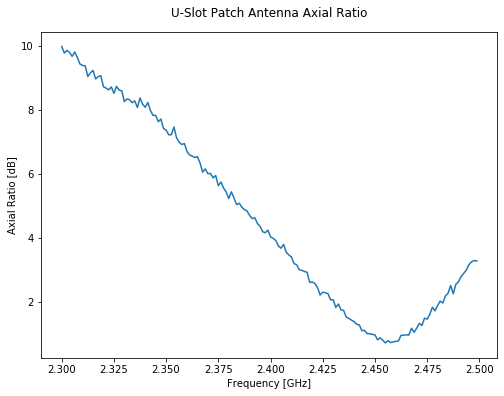

In [168]:
# Create the figure and the space
fig = plt.figure(figsize=(18, 6))
#fig = plt.figure()
ax = fig.add_subplot(1, 2, 1)
#ax_2 = fig.add_subplot(1, 2, 2)

# Plot the pattern
plot = ax.plot(frequency_gn[freq_low:freq_high], 20*np.log10(axial_ratio))

# Change the axis lebels and the title
ax.set_title('U-Slot Patch Antenna Axial Ratio', pad=15)
ax.set_xlabel('Frequency [GHz]')
ax.set_ylabel('Axial Ratio [dB]')

# Draw the surface
plt.show()

## Axial Ratio calculation (Angle)

In [165]:
v_pol_ang = np.loadtxt('Raw Data/Phase Measurement/Phase_Patch_UP_Scan.txt')
h_pol_ang = np.loadtxt('Raw Data/Phase Measurement/Phase_Patch_RIGHT_Scan.txt')

h_slice_ang = np.loadtxt('Raw Data/Antenna Pattern/Slot_Side-Horizontal_Slice.txt')
v_slice_ang = np.loadtxt('Raw Data/Antenna Pattern/Slot_Up-Vertical_Slice.txt')

angle_rage = np.asarray([phase[0] for phase in h_pol_ang])
v_pol_ang = np.asarray([phase[1] for phase in v_pol_ang])
h_pol_ang = np.asarray([phase[1] for phase in h_pol_ang])

h_slice_ang = np.asarray([phase[1] for phase in h_slice_ang])
h_slice_ang = np.interp(range(-90, 91), range(-90, 91, 2), h_slice_ang)

v_slice_ang = np.asarray([phase[1] for phase in v_slice_ang])

phase_dif_ang = np.subtract(h_pol_ang, v_pol_ang)
phase_dif_ang = np.where(phase_dif_ang < 0, 360 + phase_dif_ang, phase_dif_ang)

In [166]:
# Convert the S21 values to field values
h_slice_ang_lin = np.power(10.0, h_slice_ang/20.0)
v_slice_ang_lin = np.power(10.0, v_slice_ang/20.0)

phase_dif_ang_rad = np.deg2rad(phase_dif_ang) # Convert phase difference to radians
a_ang = np.arctan2(v_slice_ang_lin, h_slice_ang_lin)
tan_2y_ang = np.tan(2.*a_ang)*np.cos(phase_dif_ang_rad)
sin_2x_ang = np.sin(2.*a_ang)*np.sin(phase_dif_ang_rad)

x_ellipse_ang = np.arcsin(sin_2x_ang)/2.
axial_ratio_ang = 1./np.tan(x_ellipse_ang)

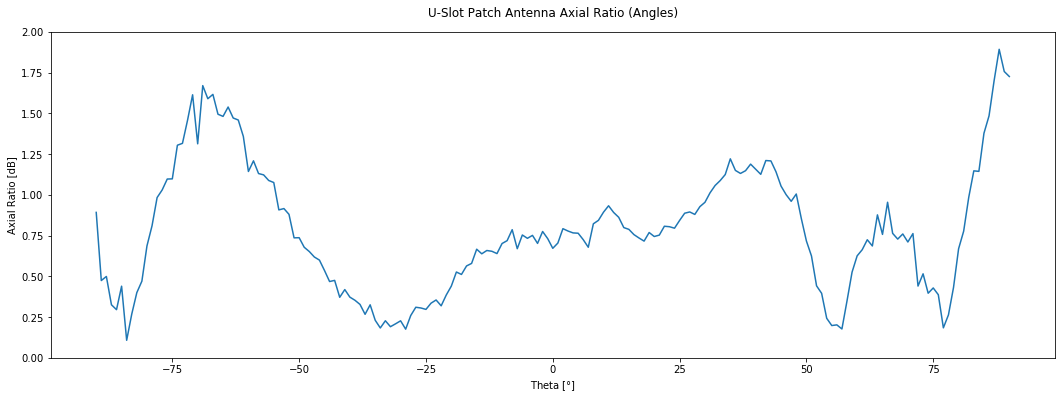

In [172]:
fig = plt.figure(figsize=(18, 6))
#fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
#ax_2 = fig.add_subplot(1, 2, 2)

# Plot the pattern
plot = ax.plot(angle_rage, 20.*np.log10(axial_ratio_ang))

ax.set_title('U-Slot Patch Antenna Axial Ratio (Angles)', pad=15)
ax.set_xlabel('Theta [$\degree$]')
ax.set_ylabel('Axial Ratio [dB]')
ax.set_ylim(0, 2)

# Draw the surface
plt.show()